# MLG: Lab 5 (Part 2)

## Exercise 3: Self-organized representation of a collection of images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

In [2]:
extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')
# Here we load images from 300-399 and from 500-599
extractor.load_images(list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)))

200 images loaded!


### Dataset Visualization

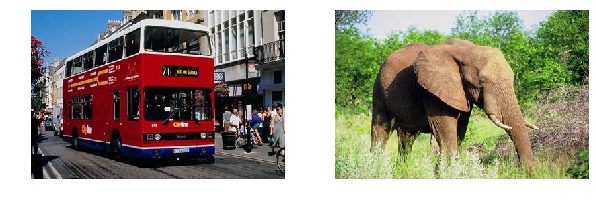

In [3]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[2])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[101])
_ = pl.axis('off')

### Clustering with SOM

In [4]:
method = 1
if method == 1:
    histograms = extractor.extract_histogram()
elif method == 2:
    histograms = extractor.extract_hue_histogram()
elif method == 3:
    histograms = extractor.extract_color_histogram()
else:
    print('Implement your own method for extracting features if you like!')

C:\Users\David\Desktop\HEIG\MLG\lab05\WangImageUtilities.py:48: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = skicol.rgb2grey(image)


In [5]:
kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

C:\Users\David\Desktop\HEIG\MLG\lab05\kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


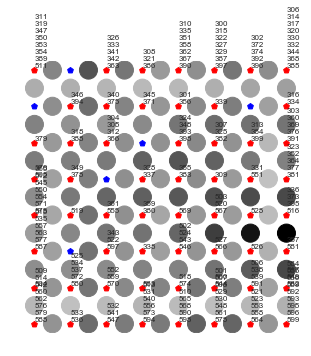

In [6]:
kmap.plot_umatrix(plot_empty=True, plot_names=True)

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [7]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
extractor.to_html('som.html', kmap)

<h3>REPORT (date of submission: 27.5 before 23:55)</h3>

1. Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>

2. Try the SOM with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. 
<ul>
<li> Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. 
<li> Include for each experiment an U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...
</ul>
</p>